<a href="https://colab.research.google.com/github/Dforouzanfar/Machine_Learning/blob/master/3.%20Applications/1.%20Text%20Mining/Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy

spaCy is an open-source Python library for advanced NLP. It is designed to handle large-scale NLP tasks efficiently and comes with pre-trained statistical models and deep learning integration.

**Key Features**
1. Tokenization
2. Named Entity Recognition - NER
3. Part-of-Speech (POS) Tagging
4. Dependency Parsing - relationships between words.
5. Word Embeddings - W2V, Glove, FastText, ...
6. Custom Pipelines
7. Multi-language Support

**Applications**
1. Text classification
2. Information extraction
3. Summarization
4. Sentiment analysis
5. Translation

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import requests
try:
  import spacy
except:
  !pip install spacy
  !python -m spacy download en
  import spacy
try:
  import sklearn
except:
  !pip install sklearn
  import sklearn

# 1. Tokenization

### spacy.blank(name)

In [ ]:
# Creating a blank English spaCy pipeline
nlp = spacy.blank("en")

nlp.pipeline # we call spacy.blank, so we don't have anything except tokenizer in the pipeline

[]

In [ ]:
# Processing a text string to extract patterns and insights
doc = nlp("Text mining is the process of extracting   meaningful patterns and insights from text data.")
doc

Text mining is the process of extracting   meaningful patterns and insights from text data.

In [ ]:
for token in doc:
  print(token)

Text
mining
is
the
process
of
extracting
  
meaningful
patterns
and
insights
from
text
data
.


In [ ]:
token = doc[1]
token.text

'mining'

#### Token Attributes

There are numerous operations we can perform on each token, leveraging its attributes. Some of the most commonly used attributes include:
* is_alpha
* is_currency
* is_digit
* is_space
* lemma
* like_email
* like_url

you can access to all the methods with ```dir(token)```

In [ ]:
token = doc[7]
token, token.is_space

(  , True)

In [ ]:
for token in doc:
  if not token.is_space and not token.is_punct:
    print(token)

Text
mining
is
the
process
of
extracting
meaningful
patterns
and
insights
from
text
data


In [ ]:
# We can also select a span of the sentence
span = doc[:5]
span

Text mining is the process

#### Adding a pipe

Visit spaCy's doc page to explore more: https://spacy.io/usage/processing-pipelines

In [ ]:
nlp.add_pipe('sentencizer')

In [ ]:
doc = nlp("Text mining is the process of extracting meaningful patterns and insights from text data. NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language.")
c = 1
for sentence in doc.sents:
    print(f"sentence {c} is:\n{sentence}\nThe words in this sentence are: ")
    for word in sentence:
      if not word.is_punct:
        print(word)
    c += 1
    print("\n")

sentence 1 is:
Text mining is the process of extracting meaningful patterns and insights from text data.
The words in this sentence are: 
Text
mining
is
the
process
of
extracting
meaningful
patterns
and
insights
from
text
data


sentence 2 is:
NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language.
The words in this sentence are: 
NLP
is
a
branch
of
artificial
intelligence
that
focuses
on
the
interaction
between
computers
and
human
language




# 2. Named Entity Recognition

## spaCy.load()

We can also load a pretrained model using ```spacy.load()```.  
To explore available models, visit spaCy's models page: https://spacy.io/models/en

In [ ]:
# Creating a blank English spaCy pipeline
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
# Processing a text string to extract patterns and insights
doc = nlp("Text mining is the process of extracting meaningful patterns and insights from text data. NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language.")

In [ ]:
# Sentence Tokenization
for sentence in doc.sents:
    print(sentence)

Text mining is the process of extracting meaningful patterns and insights from text data.
NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language.


In [ ]:
doc = nlp("As of January 2025 Apple has a market cap of $3.580 Trillion USD.")
doc.ents

In [ ]:
for ent in doc.ents:
  print(f"{ent.text:<15} | {ent.label_:<6} | {spacy.explain(ent.label_)}")

Batman          | ORG    | Companies, agencies, institutions, etc.
Gotham City     | PERSON | People, including fictional


In [ ]:
# Entities
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [ ]:
doc = nlp("As of early 2025, Musk's net worth is estimated to be approximately $426 billion, according to Bloomberg")

In [ ]:
for ent in doc.ents:
  print(f"{ent.text:<26} | {ent.label_:<6} | {spacy.explain(ent.label_)}")

early 2025                 | DATE   | Absolute or relative dates or periods
Musk                       | PERSON | People, including fictional
approximately $426 billion | MONEY  | Monetary values, including unit
Bloomberg                  | PERSON | People, including fictional


In [ ]:
# Use displacy.render for a well-structured visualization
from spacy import displacy

displacy.render(doc, style="ent")

### Custom Entities

In [ ]:
doc = nlp("Tesla is going to acquire Twitter for $45 billion")

In [ ]:
# Get maximum lengths for formatting
max_lenght_text = max(len(ent.text) for ent in doc.ents)
max_lenght_label = max(len(ent.label_) for ent in doc.ents)

# Print entities with formatted output
for ent in doc.ents:
    print(f"{ent.text:<{max_lenght_text}} | {ent.label_:<{max_lenght_label}} | {spacy.explain(ent.label_)}")

Tesla       | ORG     | Companies, agencies, institutions, etc.
Twitter     | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY   | Monetary values, including unit


In [ ]:
from spacy.tokens import Span

first_span = Span(doc, 5, 6, label="ORG")
doc.set_ents([first_span], default="unmodified") # default="unmodified": Keep other entities as they are

In [ ]:
for ent in doc.ents:
  print(f"{ent.text:<15} | {ent.label_:<10} | {spacy.explain(ent.label_)}")

Tesla           | ORG        | Companies, agencies, institutions, etc.
Twitter         | ORG        | Companies, agencies, institutions, etc.
$45 billion     | MONEY      | Monetary values, including unit


# 3. Part of Speech Tagger

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp("Batman patrols Gotham City under the cover of darkness, ensuring justice prevails against its relentless wave of crime.")

In [ ]:
for token in doc:
  print(f"{token.text:<10} | {token.pos_:<6} | {spacy.explain(token.pos_)}")

Batman     | PROPN  | proper noun
patrols    | VERB   | verb
Gotham     | PROPN  | proper noun
City       | PROPN  | proper noun
under      | ADP    | adposition
the        | DET    | determiner
cover      | NOUN   | noun
of         | ADP    | adposition
darkness   | NOUN   | noun
,          | PUNCT  | punctuation
ensuring   | VERB   | verb
justice    | NOUN   | noun
prevails   | VERB   | verb
against    | ADP    | adposition
its        | PRON   | pronoun
relentless | ADJ    | adjective
wave       | NOUN   | noun
of         | ADP    | adposition
crime      | NOUN   | noun
.          | PUNCT  | punctuation


#### Tag
It provides the language-specific, fine-grained part-of-speech (POS) tag for the token, based on the language's grammar.

Use ```tag_``` when you require detailed grammatical information (e.g., singular vs. plural nouns, verb tense).

In [ ]:
print("token", ' '*6, 'pos', ' '*4, 'pos explain', ' '*5, 'tag', ' '*4, 'tag explain', '\n', '-'*80)
for token in doc:
  print(f"{token.text:<10} | {token.pos_:<6} | {spacy.explain(token.pos_):<15} | {token.tag_:<6} | {spacy.explain(token.tag_)}")

token        pos      pos explain       tag      tag explain 
 --------------------------------------------------------------------------------
Batman     | PROPN  | proper noun     | NNP    | noun, proper singular
patrols    | VERB   | verb            | VBZ    | verb, 3rd person singular present
Gotham     | PROPN  | proper noun     | NNP    | noun, proper singular
City       | PROPN  | proper noun     | NNP    | noun, proper singular
under      | ADP    | adposition      | IN     | conjunction, subordinating or preposition
the        | DET    | determiner      | DT     | determiner
cover      | NOUN   | noun            | NN     | noun, singular or mass
of         | ADP    | adposition      | IN     | conjunction, subordinating or preposition
darkness   | NOUN   | noun            | NN     | noun, singular or mass
,          | PUNCT  | punctuation     | ,      | punctuation mark, comma
ensuring   | VERB   | verb            | VBG    | verb, gerund or present participle
justice    | NOUN

#### count_by

In [ ]:
count = doc.count_by(spacy.attrs.POS)
count

{96: 3, 100: 3, 85: 4, 90: 1, 92: 5, 97: 2, 95: 1, 84: 1}

In [ ]:
for key, value in count.items():
    print(f"{doc.vocab[key].text:<6} | {value}")

PROPN  | 3
VERB   | 3
ADP    | 4
DET    | 1
NOUN   | 5
PUNCT  | 2
PRON   | 1
ADJ    | 1


# 4. Stemming & Lemmatization
**Stemming**: Stemming is a crude heuristic process that removes word suffixes to reduce words to a common root
* playing, played, plays --> play
* eating, eats --> eat
* ate --> ate

**Lemmatization**: Lemmatization is more sophisticated and involves reducing words to their base or dictionary form
* playing, played, plays --> play
* **ate** --> eat

### Lemmatization

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp("eating eats eat ate adjustable ability meeting")

In [ ]:
for token in doc:
  print(f"Token: {token.text:<10} | Lemma: {token.lemma_}")

Token: eating     | Lemma: eat
Token: eats       | Lemma: eat
Token: eat        | Lemma: eat
Token: ate        | Lemma: eat
Token: adjustable | Lemma: adjustable
Token: ability    | Lemma: ability
Token: meeting    | Lemma: meeting


### Customizing lemmatizer

In [ ]:
doc = nlp("Dad, let's go out! Papa, don't say no")
for token in doc:
  if token.text == 'Dad' or token.text == 'Papa':
    print(f"Token: {token.text:<5} | Lemma: {token.lemma_}")

Token: Dad   | Lemma: Father
Token: Papa  | Lemma: Father


In [ ]:
attribute_r = nlp.get_pipe('attribute_ruler')

attribute_r.add(
    [
        [
            {"TEXT":"Dad"}
        ],
        [
            {"TEXT":"Papa"}
        ]
    ],
    {"LEMMA":"Father"}
  )

In [ ]:
for token in doc:
  if token.text == 'Dad' or token.text == 'Papa':
    print(f"Token: {token.text:<5} | Lemma: {token.lemma_}")

Token: Dad   | Lemma: Father
Token: Papa  | Lemma: Father


### Stemming
With spaCy we can't get the stemm of the words. We can use NLTK instead.

In [ ]:
try:
  import nltk
  from nltk.stem import PorterStemmer
except:
  !pip install nltk
  import nltk
  from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
words = ["eating", "eats", "eat", "ate", "adjustable", "ability", "meeting"]

for word in words:
  print(f"{word:<10} | {stemmer.stem(word)}")

eating     | eat
eats       | eat
eat        | eat
ate        | ate
adjustable | adjust
ability    | abil
meeting    | meet


# 5. Bag of Words

In [ ]:
import numpy as np
import pandas as pd
import requests

In [ ]:
path="https://raw.githubusercontent.com/Dforouzanfar/Machine_Learning/refs/heads/master/3.%20Applications/1.%20Text%20Mining/data/spam.csv"
with open("dataframe.csv", 'wb') as f:
  request = requests.get(path)
  f.write(request.content)

df = pd.read_csv("dataframe.csv")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Category"].value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
df['Category'] = df['Category'].map({'spam': 1, 'ham':0}).astype(int)
df.head(2)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2)

In [ ]:
len(X_train), len(X_test)

(4457, 1115)

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorize = CountVectorizer()

In [ ]:
X_train_cv = count_vectorize.fit_transform(X_train.values)
X_test_cv = count_vectorize.transform(X_test.values)

### NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       0.97      0.94      0.95       155

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### sklearn.pipeline

There is another way to do all this and use less lines of code

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = Pipeline([
              ('vectorizer', CountVectorizer()),
              ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       0.97      0.94      0.95       155

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Bag of n words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV.fit(["The cat is sleeping peacefully on the warm blanket for cat."])

# Just asssign a number to each word (It doesn't care about the number of appearance)
CV.vocabulary_

{'the': 7,
 'cat': 1,
 'is': 3,
 'sleeping': 6,
 'peacefully': 5,
 'on': 4,
 'warm': 8,
 'blanket': 0,
 'for': 2}

In [ ]:
# Sort the dictionary by its values
our_dict = dict(sorted(CV.vocabulary_.items(), key=lambda item: item[1]))
our_dict

{'blanket': 0,
 'cat': 1,
 'for': 2,
 'is': 3,
 'on': 4,
 'peacefully': 5,
 'sleeping': 6,
 'the': 7,
 'warm': 8}

#### ngram_range

In [ ]:
CV = CountVectorizer(ngram_range=(1, 2))
CV.fit(["The cat is sleeping peacefully on the warm blanket for cat."])

CV.vocabulary_, len(CV.vocabulary_)

({'the': 14,
  'cat': 2,
  'is': 6,
  'sleeping': 12,
  'peacefully': 10,
  'on': 8,
  'warm': 17,
  'blanket': 0,
  'for': 4,
  'the cat': 15,
  'cat is': 3,
  'is sleeping': 7,
  'sleeping peacefully': 13,
  'peacefully on': 11,
  'on the': 9,
  'the warm': 16,
  'warm blanket': 18,
  'blanket for': 1,
  'for cat': 5},
 19)

In [ ]:
CV = CountVectorizer(ngram_range=(2, 2))
CV.fit(["The cat is sleeping peacefully on the warm blanket for cat."])

CV.vocabulary_, len(CV.vocabulary_)

({'the cat': 7,
  'cat is': 1,
  'is sleeping': 3,
  'sleeping peacefully': 6,
  'peacefully on': 5,
  'on the': 4,
  'the warm': 8,
  'warm blanket': 9,
  'blanket for': 0,
  'for cat': 2},
 10)

### News dataset

In [ ]:
with open("news_dataset.json", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/Dforouzanfar/Machine_Learning/refs/heads/master/3.%20Applications/1.%20Text%20Mining/data/news.json")
  f.write(request.content)

df = pd.read_json('news_dataset.json')
df.head()

In [ ]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [ ]:
df["category"].value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


In [ ]:
min_sample = df["category"].value_counts().min()

df_business = df[df["category"]=="BUSINESS"].sample(min_sample, random_state=42)
df_sports = df[df["category"]=="SPORTS"].sample(min_sample, random_state=42)
df_crime = df[df["category"]=="CRIME"].sample(min_sample, random_state=42)
df_science = df[df["category"]=="SCIENCE"].sample(min_sample, random_state=42)

In [ ]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science])
df_balanced["category"].value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


In [ ]:
df_balanced["category"] = df_balanced["category"].map({"BUSINESS": 0,
                                                       "SPORTS": 1,
                                                       "CRIME": 2,
                                                       "SCIENCE": 3})

In [ ]:
df_balanced["category"].unique()

array([0, 1, 2, 3])

### Build a model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced["text"],
                                                    df_balanced["category"],
                                                    test_size=0.2,
                                                    stratify=df_balanced["category"])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

#### ngram_range=(1,1)

In [ ]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       276
           1       0.89      0.80      0.84       277
           2       0.85      0.89      0.87       276
           3       0.90      0.84      0.87       276

    accuracy                           0.85      1105
   macro avg       0.85      0.85      0.85      1105
weighted avg       0.85      0.85      0.85      1105



#### ngram_range=(1, 2)

In [ ]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       276
           1       0.91      0.76      0.83       277
           2       0.87      0.88      0.88       276
           3       0.92      0.83      0.87       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



#### ngram_range=(1, 3)

In [ ]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       276
           1       0.92      0.75      0.82       277
           2       0.87      0.88      0.88       276
           3       0.92      0.80      0.85       276

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.84      1105
weighted avg       0.85      0.83      0.84      1105



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[252,   8,   9,   7],
       [ 42, 207,  20,   8],
       [ 22,   7, 242,   5],
       [ 45,   4,   6, 221]])

Text(95.72222222222221, 0.5, 'Truth')

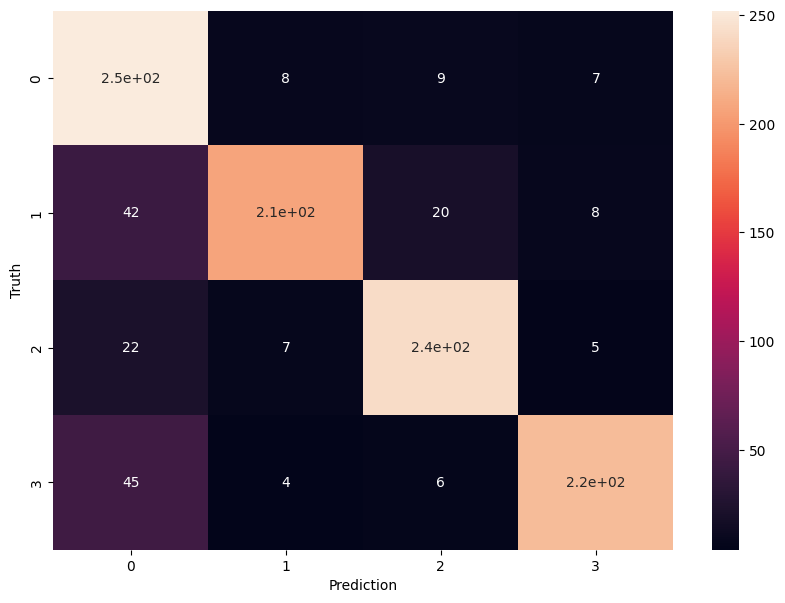

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

# 6. Stop Words

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = list(STOP_WORDS)
stop_words[:10]

['since',
 'name',
 'twelve',
 '‘d',
 'under',
 'will',
 'beyond',
 'became',
 'yours',
 'among']

In [ ]:
def omit_stop_words(text):
  doc = nlp(text)
  no_stop_words = [token.text for token in doc if not token.is_stop]

  return ' '.join(no_stop_words)

In [ ]:
omit_stop_words("As the morning breeze rustled through the leaves, the distant mountains gradually emerged from the fog, their peaks kissed by the first light of dawn.")

'morning breeze rustled leaves , distant mountains gradually emerged fog , peaks kissed light dawn .'

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Message"] = df["Message"].apply(omit_stop_words)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2)

In [ ]:
clf = Pipeline([
              ('vectorizer', CountVectorizer()),
              ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.95      0.90      0.92       156

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# 7. TF-IDF
Term Frequency - Inverse Document Frequency

$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)$

---


$\text{TF-IDF}(t, d, D) = \frac{f_{t, d}}{\sum_{t' \in d} f_{t', d}} \times \log\left(\frac{N}{1 + |\{d \in D : t \in d\}|}\right)$

---

$f_{t, d}$: Frequency of term t in document d.  
$\sum_{t' \in d} f_{t', d}$: Total frequency of all terms in document d.  
N: Total number of documents in the corpus D.  
$ ({1 + |\{d \in D : t \in d\}|})$: Number of documents in D containing the term t.




In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
corpus = [
    "Batman is driving the Batmobile, Robin is riding the motorcycle, and Joker is running away",
    "Samsung is unveiling its new Galaxy S30 today",
    "SpaceX is launching a Falcon Heavy rocket tomorrow",
    "Netflix is releasing a new series this weekend",
    "Apple is holding a keynote to introduce new MacBooks",
    "Meta is announcing updates to its virtual reality headsets",
    "I am drinking coffee, and you are drinking tea"
]

In [4]:
tfidf = TfidfVectorizer()
tfidf.fit(corpus)
print(tfidf.vocabulary_)

{'batman': 6, 'is': 17, 'driving': 10, 'the': 38, 'batmobile': 7, 'robin': 30, 'riding': 29, 'motorcycle': 24, 'and': 1, 'joker': 19, 'running': 32, 'away': 5, 'samsung': 34, 'unveiling': 43, 'its': 18, 'new': 26, 'galaxy': 12, 's30': 33, 'today': 41, 'spacex': 36, 'launching': 21, 'falcon': 11, 'heavy': 14, 'rocket': 31, 'tomorrow': 42, 'netflix': 25, 'releasing': 28, 'series': 35, 'this': 39, 'weekend': 46, 'apple': 3, 'holding': 15, 'keynote': 20, 'to': 40, 'introduce': 16, 'macbooks': 22, 'meta': 23, 'announcing': 2, 'updates': 44, 'virtual': 45, 'reality': 27, 'headsets': 13, 'am': 0, 'drinking': 9, 'coffee': 8, 'you': 47, 'are': 4, 'tea': 37}


In [5]:
output = tfidf.transform(corpus)

<7x48 sparse matrix of type '<class 'numpy.float64'>'
	with 58 stored elements in Compressed Sparse Row format>

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = list(STOP_WORDS)

In [12]:
#let's print the idf of each word:

all_feature_names = tfidf.get_feature_names_out()

for word in all_feature_names:
  if word not in (stop_words):
    #let's get the index in the vocabulary
    indx = tfidf.vocabulary_.get(word)

    #get the score
    idf_score = tfidf.idf_[indx]

    print(f"{word:<10}: {idf_score:<0.4f}")

announcing: 2.3863
apple     : 2.3863
away      : 2.3863
batman    : 2.3863
batmobile : 2.3863
coffee    : 2.3863
drinking  : 2.3863
driving   : 2.3863
falcon    : 2.3863
galaxy    : 2.3863
headsets  : 2.3863
heavy     : 2.3863
holding   : 2.3863
introduce : 2.3863
joker     : 2.3863
keynote   : 2.3863
launching : 2.3863
macbooks  : 2.3863
meta      : 2.3863
motorcycle: 2.3863
netflix   : 2.3863
new       : 1.6931
reality   : 2.3863
releasing : 2.3863
riding    : 2.3863
robin     : 2.3863
rocket    : 2.3863
running   : 2.3863
s30       : 2.3863
samsung   : 2.3863
series    : 2.3863
spacex    : 2.3863
tea       : 2.3863
today     : 2.3863
tomorrow  : 2.3863
unveiling : 2.3863
updates   : 2.3863
virtual   : 2.3863
weekend   : 2.3863


In [13]:
with open("ecommerce.csv", 'wb') as f:
  request = requests.get("https://raw.githubusercontent.com/Dforouzanfar/Machine_Learning/refs/heads/master/3.%20Applications/1.%20Text%20Mining/data/Ecommerce_data.csv")
  f.write(request.content)

df = pd.read_csv('ecommerce.csv')
df.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [14]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [15]:
df['label'] = df['label'].map({
                              'Household' : 0,
                              'Books': 1,
                              'Electronics': 2,
                              'Clothing & Accessories': 3
})

#checking the results
df.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,3
4,Indira Designer Women's Art Mysore Silk Saree ...,3


In [21]:
# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)

  return " ".join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

In [22]:
df['Text'] = df['Text'].apply(preprocess)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["Text"],
    df["label"],
    test_size=0.2,
    random_state=2022,
    stratify=df["label"]
)

In [24]:
X_train.shape, X_test.shape

((19200,), (4800,))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

# fit the model
clf.fit(X_train, y_train)

# get the predictions for X_test
y_pred = clf.predict(X_test)

# classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [26]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.99      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [27]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.99      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



Text(95.72222222222221, 0.5, 'Truth')

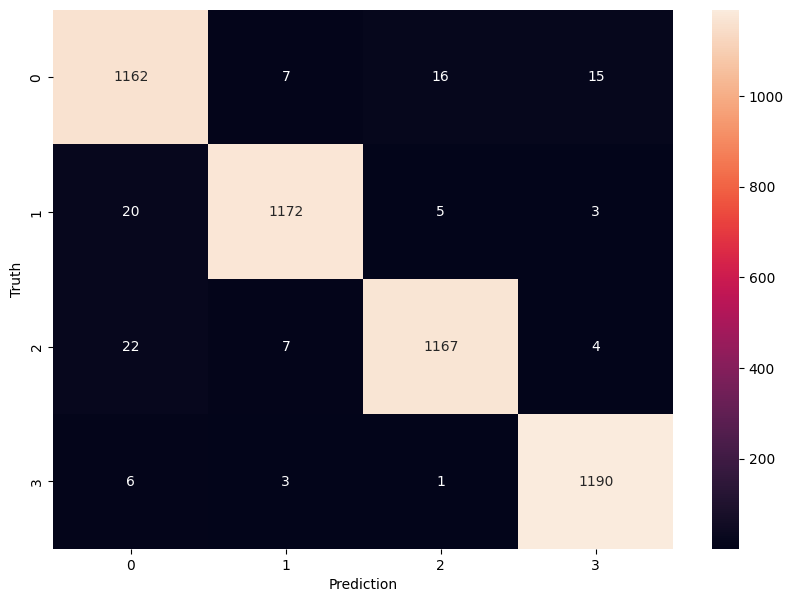

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# 8. Word Vectors

### Gensim

In [48]:
import gensim.downloader as api

# This a large model and it takes some time to load
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Similarity between words

In [49]:
wv.similarity(w1="great", w2="good")

0.729151

In [50]:
wv.most_similar("dog")

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

In [ ]:
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

In [44]:
doc = nlp("book phone mall Nietzsche screen sandwich")

base_token = nlp("book")

for token in doc:
  print(f"{token.text:<9} <-> {base_token.text:<6}: {token.similarity(base_token)}")

book      <-> book  : 0.9999998536453686
phone     <-> book  : 0.1812022159113761
mall      <-> book  : 0.04028751551682923
Nietzsche <-> book  : 0.3174339731201806
screen    <-> book  : 0.22259490653912534
sandwich  <-> book  : 0.04665382688082745


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab["queen"].vector

result = king - man + woman

cosine_similarity([result], [queen])

array([[0.61780137]], dtype=float32)

In [51]:
wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

In [52]:
wv.doesnt_match(["facebook", "cat", "google", "microsoft"])

'cat'